# Importing necessary library

In [41]:
import sys
sys.path.insert(0, '../src')
from terminal_script import read_data
from terminal_script import plot_top_10_by_state
from terminal_script import two_sample_t_test
from terminal_script import t_test_against_others
import importlib
importlib.reload(sys.modules['terminal_script'])

<module 'terminal_script' from '../src/terminal_script.py'>

In [22]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Loading Source Data into Pandas

In [23]:
df_raw = read_data('../data/2020_01_ALL.csv')

In [87]:
df_raw.sample(5)

,YEAR,QUARTER,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE,Unnamed: 22
420191,2020,1,1,2020-01-28,UA,2421,12266,IAH,"Houston, TX",TX,...,NV,745,735.0,-10.0,911,853.0,-18.0,0.0,1222.0,NaN
606543,2020,1,1,2020-01-30,9E,4937,11193,CVG,"Cincinnati, OH",KY,...,TX,715,714.0,-1.0,909,843.0,-26.0,0.0,812.0,NaN
23814,2020,1,1,2020-01-16,YV,6095,10693,BNA,"Nashville, TN",TN,...,TX,620,608.0,-12.0,855,825.0,-30.0,0.0,657.0,NaN
259678,2020,1,1,2020-01-16,OO,5617,14771,SFO,"San Francisco, CA",CA,...,ID,833,908.0,35.0,1141,1254.0,73.0,0.0,587.0,NaN
105035,2020,1,1,2020-01-20,UA,2400,10721,BOS,"Boston, MA",MA,...,CA,1753,1750.0,-3.0,2150,2059.0,-51.0,0.0,2704.0,NaN


In [88]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 23 columns):
YEAR                 607346 non-null int64
QUARTER              607346 non-null int64
MONTH                607346 non-null int64
FL_DATE              607346 non-null object
OP_UNIQUE_CARRIER    607346 non-null object
OP_CARRIER_FL_NUM    607346 non-null int64
ORIGIN_AIRPORT_ID    607346 non-null int64
ORIGIN               607346 non-null object
ORIGIN_CITY_NAME     607346 non-null object
ORIGIN_STATE_ABR     607346 non-null object
DEST_AIRPORT_ID      607346 non-null int64
DEST                 607346 non-null object
DEST_CITY_NAME       607346 non-null object
DEST_STATE_ABR       607346 non-null object
CRS_DEP_TIME         607346 non-null int64
DEP_TIME             600682 non-null float64
DEP_DELAY            600647 non-null float64
CRS_ARR_TIME         607346 non-null int64
ARR_TIME             600271 non-null float64
ARR_DELAY            599268 non-null float64
CANCELLED    

In [17]:
print(df_raw['ORIGIN_CITY_NAME'].unique())
df_raw['ORIGIN_CITY_NAME'].nunique()

['Ontario, CA' 'Norfolk, VA' 'West Palm Beach/Palm Beach, FL'
 'Portland, OR' 'Philadelphia, PA' 'Phoenix, AZ' 'Pittsburgh, PA'
 'Pensacola, FL' 'Providence, RI' 'Portland, ME' 'Raleigh/Durham, NC'
 'Richmond, VA' 'Reno, NV' 'Rochester, NY' 'Fort Myers, FL'
 'San Diego, CA' 'San Antonio, TX' 'Louisville, KY' 'Seattle, WA'
 'San Francisco, CA' 'San Jose, CA' 'San Juan, PR' 'Salt Lake City, UT'
 'Sacramento, CA' 'Santa Ana, CA' 'St. Louis, MO' 'Tampa, FL' 'Tulsa, OK'
 'Tucson, AZ' 'Albuquerque, NM' 'Albany, NY' 'Amarillo, TX' 'Atlanta, GA'
 'Austin, TX' 'Dallas, TX' 'New Orleans, LA' 'Oakland, CA' 'Kahului, HI'
 'Oklahoma City, OK' 'Omaha, NE' 'Hartford, CT' 'Birmingham, AL'
 'Nashville, TN' 'Boise, ID' 'Boston, MA' 'Buffalo, NY' 'Burbank, CA'
 'Baltimore, MD' 'Charleston, SC' 'Cleveland, OH' 'Charlotte, NC'
 'Columbus, OH' 'Corpus Christi, TX' 'Cincinnati, OH' 'Washington, DC'
 'Denver, CO' 'Des Moines, IA' 'Detroit, MI' 'Panama City, FL'
 'El Paso, TX' 'Fort Lauderdale, FL' 'Spokane, W

344

In [18]:
print(df_raw['DEST_CITY_NAME'].unique())
df_raw['DEST_CITY_NAME'].nunique()

['San Francisco, CA' 'San Jose, CA' 'Sacramento, CA' 'Baltimore, MD'
 'Orlando, FL' 'Chicago, IL' 'Atlanta, GA' 'Islip, NY' 'Burbank, CA'
 'Dallas, TX' 'Denver, CO' 'Las Vegas, NV' 'Los Angeles, CA' 'Oakland, CA'
 'Ontario, CA' 'Phoenix, AZ' 'San Diego, CA' 'St. Louis, MO'
 'Nashville, TN' 'Fort Lauderdale, FL' 'Houston, TX' 'Tampa, FL'
 'Albuquerque, NM' 'Austin, TX' 'Boise, ID' 'Buffalo, NY' 'Cleveland, OH'
 'Columbus, OH' 'Detroit, MI' 'El Paso, TX' 'Spokane, WA' 'Wichita, KS'
 'Indianapolis, IN' 'Little Rock, AR' 'Kansas City, MO' 'Milwaukee, WI'
 'Minneapolis, MN' 'New Orleans, LA' 'Oklahoma City, OK' 'Omaha, NE'
 'Portland, OR' 'Philadelphia, PA' 'Pittsburgh, PA' 'Raleigh/Durham, NC'
 'Reno, NV' 'San Antonio, TX' 'Louisville, KY' 'Seattle, WA'
 'Salt Lake City, UT' 'Santa Ana, CA' 'Tulsa, OK' 'Fort Myers, FL'
 'Washington, DC' 'Hartford, CT' 'Tucson, AZ' 'Honolulu, HI'
 'Long Beach, CA' 'Kahului, HI' 'Boston, MA' 'Des Moines, IA'
 'New York, NY' 'Albany, NY' 'Birmingham, AL' 'Mem

343

In [12]:
most_popular_origin = df_raw['ORIGIN_CITY_NAME'].value_counts().head(20)
most_popular_origin

Atlanta, GA              32190
Chicago, IL              31796
Dallas/Fort Worth, TX    24339
New York, NY             24148
Denver, CO               20398
Charlotte, NC            19995
Houston, TX              19711
Los Angeles, CA          17799
Washington, DC           16680
Phoenix, AZ              15820
Las Vegas, NV            14186
San Francisco, CA        13684
Detroit, MI              13195
Orlando, FL              12820
Minneapolis, MN          12429
Boston, MA               12182
Seattle, WA              11583
Newark, NJ               11415
Salt Lake City, UT       10196
Fort Lauderdale, FL       9446
Name: ORIGIN_CITY_NAME, dtype: int64

In [16]:
print(f'total number of flights:{np.sum(most_popular_origin)}')
print(f'from top 10 airports:{np.sum(most_popular_origin[0:10])}')
print(f'proportion:{np.sum(most_popular_origin[0:10])/np.sum(most_popular_origin):.2f}')

total number of flights:344012
from top 10 airports:222876
proportion:0.65


In [90]:
most_popular_dest = df_raw['DEST_CITY_NAME'].value_counts().head(20)
most_popular_dest

Atlanta, GA              32187
Chicago, IL              31824
Dallas/Fort Worth, TX    24354
New York, NY             24138
Denver, CO               20405
Charlotte, NC            20002
Houston, TX              19709
Los Angeles, CA          17794
Washington, DC           16672
Phoenix, AZ              15828
Las Vegas, NV            14184
San Francisco, CA        13686
Detroit, MI              13190
Orlando, FL              12816
Minneapolis, MN          12428
Boston, MA               12190
Seattle, WA              11585
Newark, NJ               11420
Salt Lake City, UT       10213
Fort Lauderdale, FL       9445
Name: DEST_CITY_NAME, dtype: int64

# Top airports by State (CA, NY, TX)

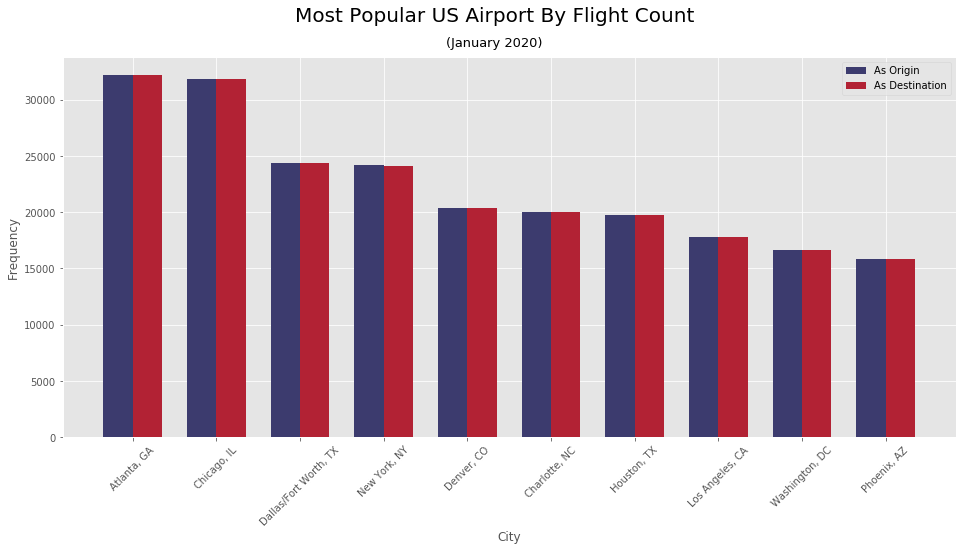

In [91]:
plot_top_10_by_state(df_raw,'US','#3C3B6E','#B22234')

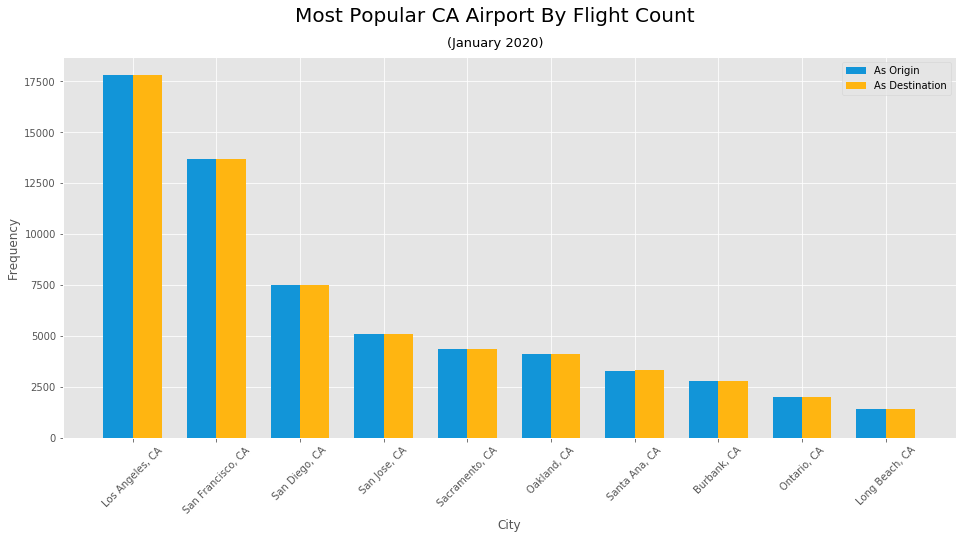

In [92]:
plot_top_10_by_state(df_raw,'CA','#1295D8','#FFB511')

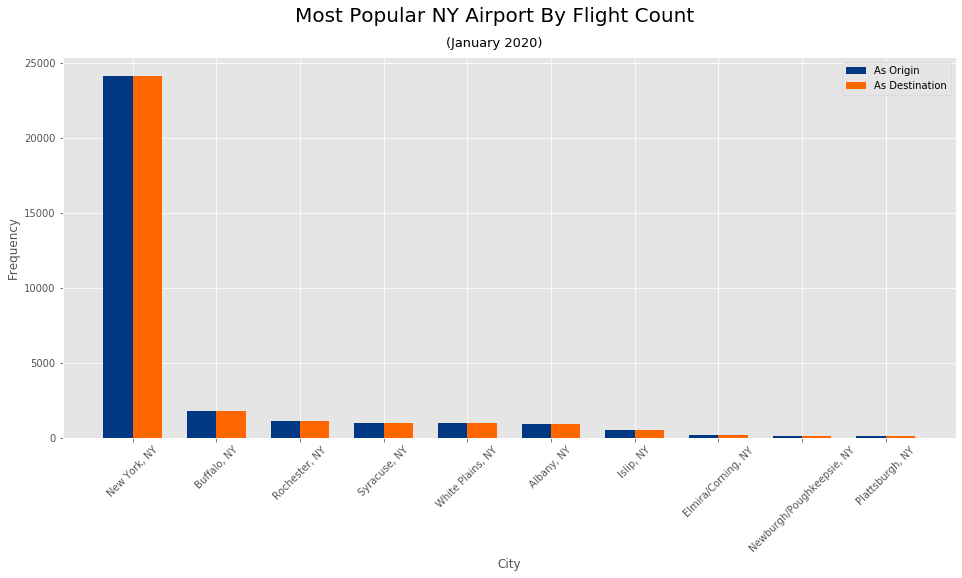

In [93]:
plot_top_10_by_state(df_raw,'NY','#003884','#ff6600')

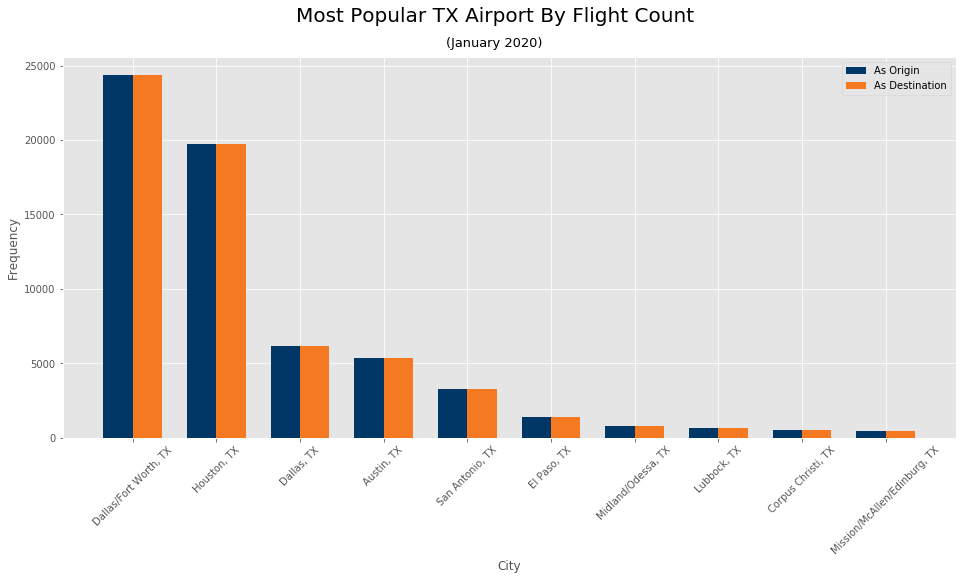

In [94]:
plot_top_10_by_state(df_raw,'TX','#003767','#F47920')

# Cancelled Flight Statistics

In [4]:
cancelled_flight = df_raw.groupby('ORIGIN_CITY_NAME').agg(
    total_flight=pd.NamedAgg(column='CANCELLED',aggfunc='count'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum')
).sort_values(by='cancelled_count',ascending=False)
cancelled_flight

,total_flight,cancelled_count
ORIGIN_CITY_NAME,,
"Chicago, IL",31796,1138.0
"Dallas/Fort Worth, TX",24339,466.0
"Denver, CO",20398,205.0
"Dallas, TX",6167,200.0
"Kansas City, MO",4321,198.0
...,...,...
"Elko, NV",58,0.0
"Dothan, AL",115,0.0
"Daytona Beach, FL",302,0.0


In [5]:
cancelled_flight = cancelled_flight.reset_index()

Text(0.5, 0.9, 'Airport with most cancelled flights in Jan 2020')

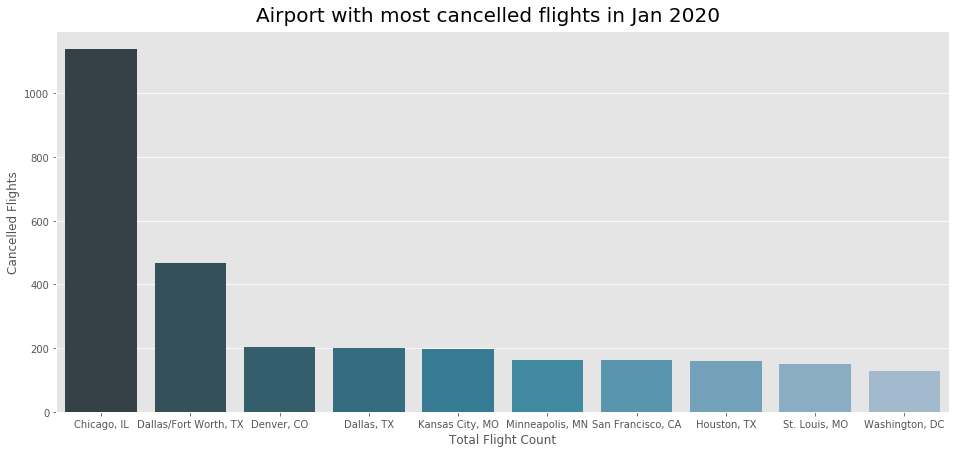

In [78]:
cancelled_flight[0:10]
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_count',data=cancelled_flight[0:10],palette='PuBuGn_d')
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.9,'Airport with most cancelled flights in Jan 2020', fontsize=20, ha='center')

In [81]:
cancelled_flight['cancelled_rate'] = cancelled_flight['cancelled_count'] / cancelled_flight['total_flight']

In [83]:
cancelled_flight.sort_values(by='cancelled_rate',ascending=False)

,ORIGIN_CITY_NAME,total_flight,cancelled_count,cancelled_rate
28,"Sun Valley/Hailey/Ketchum, ID",196,54.0,0.275510
72,"Ogdensburg, NY",62,14.0,0.225806
94,"Cordova, AK",60,10.0,0.166667
109,"Muskegon, MI",61,9.0,0.147541
130,"Yakutat, AK",60,8.0,0.133333
...,...,...,...,...
310,"Santa Maria, CA",16,0.0,0.000000
311,"Columbus, MS",112,0.0,0.000000
312,"Saipan, TT",44,0.0,0.000000
313,"Ogden, UT",9,0.0,0.000000


Text(0.5, 0.9, 'Airport with highest cancellation rate in Jan 2020')

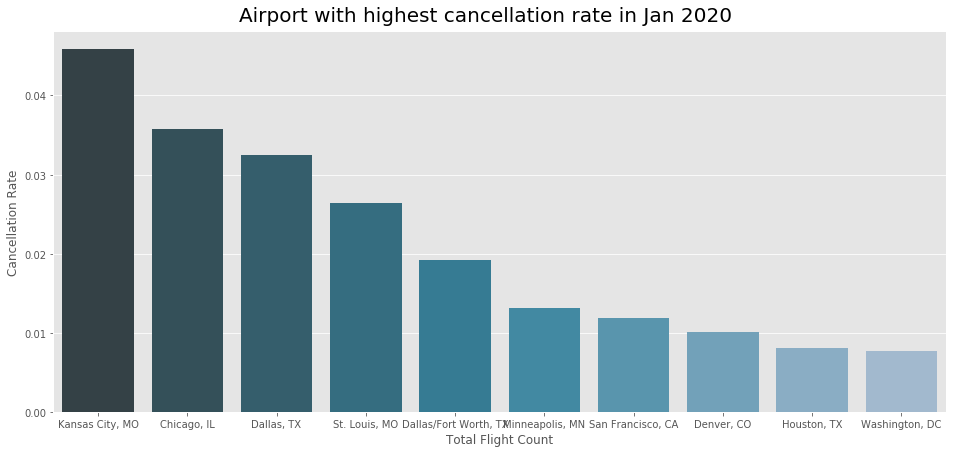

In [86]:
cancelled_flight = cancelled_flight[0:10].sort_values(by='cancelled_rate',ascending=False)
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_rate',data=cancelled_flight[0:10],palette='PuBuGn_d')
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancellation Rate')
plt.figtext(.5,.9,'Airport with highest cancellation rate in Jan 2020', fontsize=20, ha='center')

#### Correlation between flight count and cancelled flight count

In [68]:
cancelled_flight.describe()

,total_flight,cancelled_count
count,344.000000,344.000000
mean,1765.540698,20.139535
std,4380.956291,72.383400
min,1.000000,0.000000
25%,85.000000,1.000000
50%,273.000000,5.000000
75%,1026.750000,11.000000
max,32190.000000,1138.000000


In [38]:
cancelled_flight.corr()

,total_flight,cancelled_count
total_flight,1.000000,0.704857
cancelled_count,0.704857,1.000000


Text(0.85, 0.37, 'r = .705')

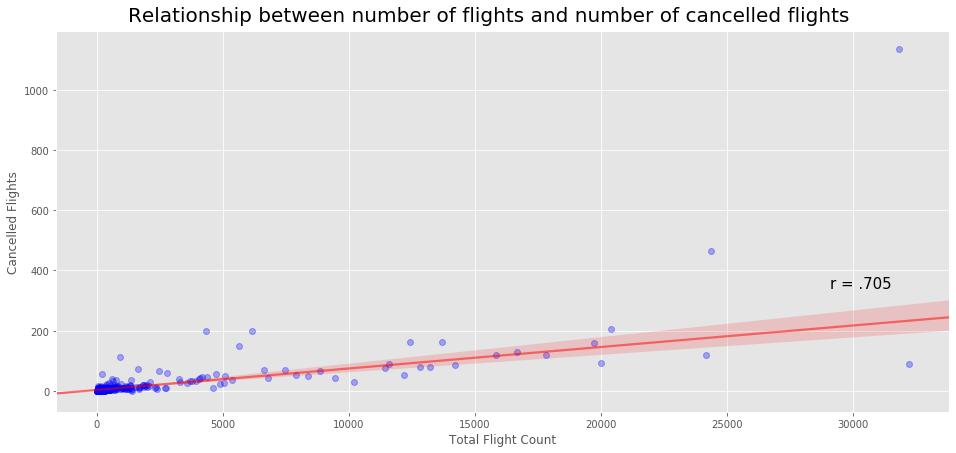

In [67]:
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.regplot(x='total_flight',y='cancelled_count',data=cancelled_flight,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.9,'Relationship between number of flights and number of cancelled flights', fontsize=20, ha='center')
plt.figtext(.85,.37,'r = .705', fontsize=15, ha='right')

#### Focus on busy airports: Flight > median

In [6]:
busy_airport = cancelled_flight[(cancelled_flight['total_flight'] > 273)]
busy_airport

,ORIGIN_CITY_NAME,total_flight,cancelled_count
0,"Chicago, IL",31796,1138.0
1,"Dallas/Fort Worth, TX",24339,466.0
2,"Denver, CO",20398,205.0
3,"Dallas, TX",6167,200.0
4,"Kansas City, MO",4321,198.0
...,...,...,...
302,"Billings, MT",308,0.0
305,"Atlantic City, NJ",287,0.0
321,"Long Beach, CA",1399,0.0
328,"St. George, UT",335,0.0


In [55]:
busy_airport.corr()

,total_flight,cancelled_count
total_flight,1.000000,0.685406
cancelled_count,0.685406,1.000000


Text(0.85, 0.37, 'r = .685')

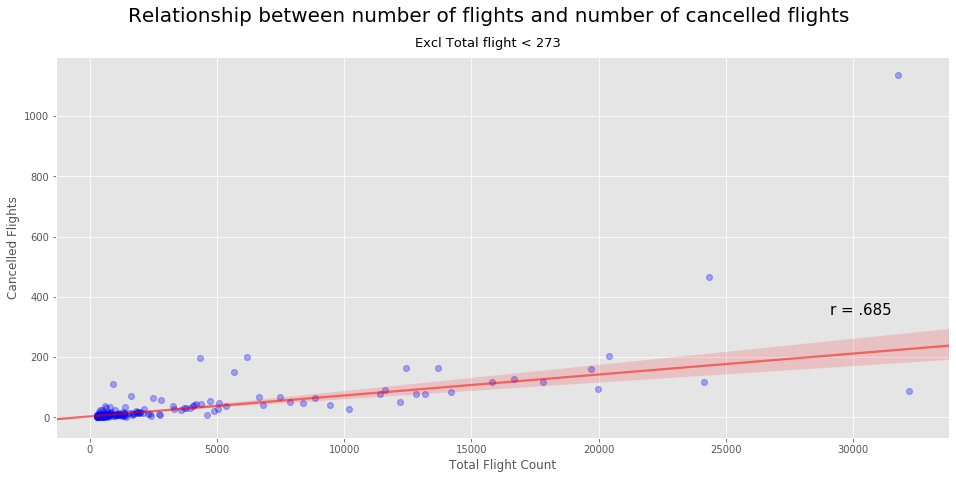

In [63]:
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.regplot(x='total_flight',y='cancelled_count',data=busy_airport,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.95,'Relationship between number of flights and number of cancelled flights', fontsize=20, ha='center')
plt.figtext(.5,.9,'Excl Total flight < 273', fontsize=13, ha='center')
plt.figtext(.85,.37,'r = .685', fontsize=15, ha='right')

#### Excluding outliers (Chicago, Dal/FW)

In [7]:
busy_airport_excl_outlier = cancelled_flight[(cancelled_flight['total_flight'] > 273) & (cancelled_flight['ORIGIN_CITY_NAME'] != 'Chicago, IL') & (cancelled_flight['ORIGIN_CITY_NAME'] != 'Dallas/Fort Worth, TX')]

busy_airport_excl_outlier

,ORIGIN_CITY_NAME,total_flight,cancelled_count
2,"Denver, CO",20398,205.0
3,"Dallas, TX",6167,200.0
4,"Kansas City, MO",4321,198.0
5,"Minneapolis, MN",12429,163.0
6,"San Francisco, CA",13684,163.0
...,...,...,...
302,"Billings, MT",308,0.0
305,"Atlantic City, NJ",287,0.0
321,"Long Beach, CA",1399,0.0
328,"St. George, UT",335,0.0


In [37]:
busy_airport_excl_outlier.corr()

,total_flight,cancelled_count
total_flight,1.00000,0.74625
cancelled_count,0.74625,1.00000


Text(0.79, 0.7, 'r = .746')

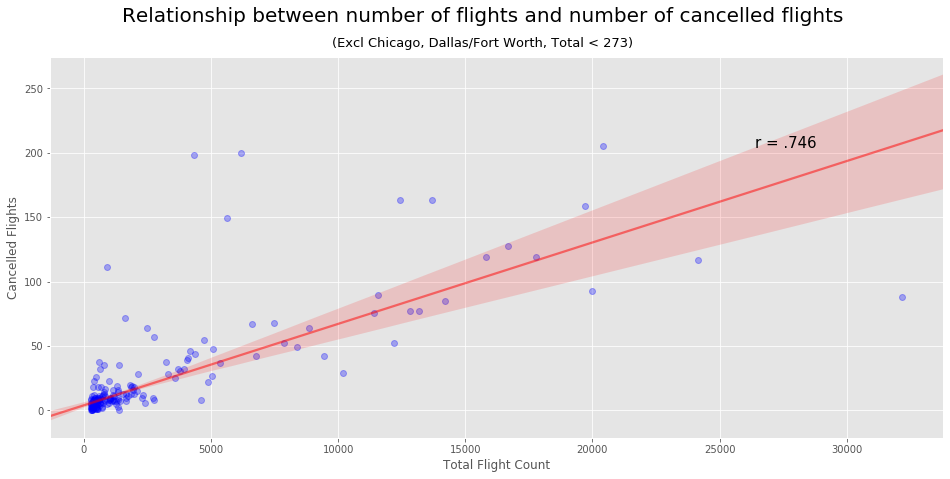

In [66]:
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.regplot(x='total_flight',y='cancelled_count',data=busy_airport_excl_outlier,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.95,f'Relationship between number of flights and number of cancelled flights', fontsize=20, ha='center')
plt.figtext(.5,.9,'(Excl Chicago, Dallas/Fort Worth, Total < 273)',fontsize=13,ha='center')
plt.figtext(.79,.7,'r = .746', fontsize=15, ha='right')

# Flight Delay Statistics

In [151]:
flight_delay = df_raw.groupby('ORIGIN_CITY_NAME').agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    average_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    std_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='std')
).sort_values(by='average_delay_min',ascending=False)
flight_delay

,total_flight,average_delay_min,std_delay_min
ORIGIN_CITY_NAME,,,
"Alpena, MI",53,58.962264,266.735822
"Williston, ND",67,58.746269,232.130537
"Pellston, MI",75,55.400000,289.451905
"Marquette, MI",92,54.336957,170.569974
"Escanaba, MI",53,53.396226,219.408851
...,...,...,...
"Watertown, SD",56,-6.250000,24.373048
"Cedar City, UT",54,-6.277778,12.558417
"Quincy, IL",10,-7.600000,7.275530


In [110]:
delay_sfo = flight_delay.loc['San Francisco, CA']
delay_sfo

total_flight         13524.000000
average_delay_min       12.588287
std_delay_min           44.671065
Name: San Francisco, CA, dtype: float64

In [150]:
df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA")]['DEP_DELAY'].describe()

count    13524.000000
mean         9.048802
std         44.671065
min        -23.000000
25%         -6.000000
50%         -3.000000
75%          4.000000
max       1118.000000
Name: DEP_DELAY, dtype: float64

#### 95% CI

In [160]:
print(df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA")]['DEP_DELAY'].quantile(q=0.025))
print(df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA")]['DEP_DELAY'].quantile(q=0.975))

-12.0
117.0


In [4]:
sfo_delay_early = df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA") & (df_raw['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values(by='DEP_DELAY',ascending=False)
sfo_delay_early

,ORIGIN_CITY_NAME,DEP_DELAY
252122,"San Francisco, CA",1118.0
268330,"San Francisco, CA",960.0
95569,"San Francisco, CA",942.0
41375,"San Francisco, CA",822.0
554428,"San Francisco, CA",796.0
...,...,...
508705,"San Francisco, CA",-21.0
355929,"San Francisco, CA",-22.0
354696,"San Francisco, CA",-23.0
507418,"San Francisco, CA",-23.0


Text(0.5, 0.95, 'Flight Delay (As Origin)')

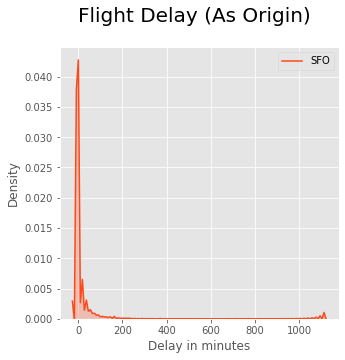

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.distplot(sfo_delay_early.DEP_DELAY, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 1.5, 'color': '#FF4819'}, label="SFO")

ax.set_xlabel('Delay in minutes')
ax.set_ylabel('Density')
# plt.xlim(-23,117)
plt.figtext(.5,.95,'Flight Delay (As Origin)', fontsize=20, ha='center')

In [11]:
airport_list = ['Atlanta, GA',
'Chicago, IL',
'Dallas/Fort Worth, TX',
'New York, NY',
'Denver, CO',
'Charlotte, NC',
'Houston, TX',
'Los Angeles, CA',
'Washington, DC',
'Phoenix, AZ',
'San Francisco, CA']

multi_delay_early = df_raw[(df_raw['ORIGIN_CITY_NAME'].isin(airport_list)) & (df_raw['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values(by='DEP_DELAY',ascending=False)
multi_delay_early

,ORIGIN_CITY_NAME,DEP_DELAY
373634,"Chicago, IL",1596.0
249809,"Los Angeles, CA",1495.0
373641,"Chicago, IL",1394.0
426931,"Denver, CO",1370.0
283249,"New York, NY",1352.0
...,...,...
488932,"Washington, DC",-26.0
578091,"Houston, TX",-27.0
90680,"Washington, DC",-27.0
89128,"Chicago, IL",-29.0


In [30]:
# total # of flight
multi_delay_early['ORIGIN_CITY_NAME'].value_counts()

Atlanta, GA              32107
Chicago, IL              30688
New York, NY             24035
Dallas/Fort Worth, TX    23891
Denver, CO               20211
Charlotte, NC            19911
Houston, TX              19565
Los Angeles, CA          17683
Washington, DC           16559
Phoenix, AZ              15710
San Francisco, CA        13524
Name: ORIGIN_CITY_NAME, dtype: int64

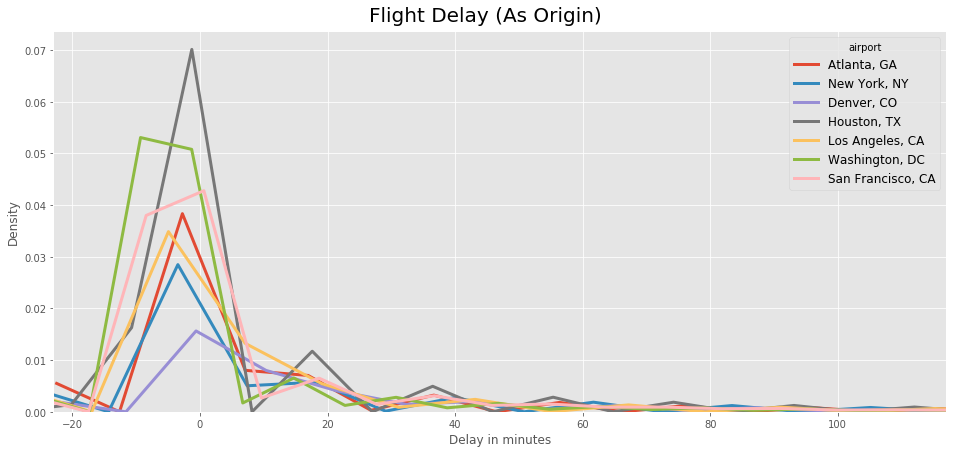

In [47]:
fig, ax = plt.subplots(figsize=(16,7))

for airport in airport_list:
    one_airport = multi_delay_early[multi_delay_early['ORIGIN_CITY_NAME'] == airport]
    sns.distplot(one_airport['DEP_DELAY'], hist=False, kde=True, kde_kws={'linewidth':3},label=airport)

ax.set_xlabel('Delay in minutes')
ax.set_ylabel('Density')
plt.figtext(.5,.9,'Flight Delay (As Origin)', fontsize=20, ha='center')
plt.xlim(-23,117)
plt.legend(prop={'size':12},title='airport')

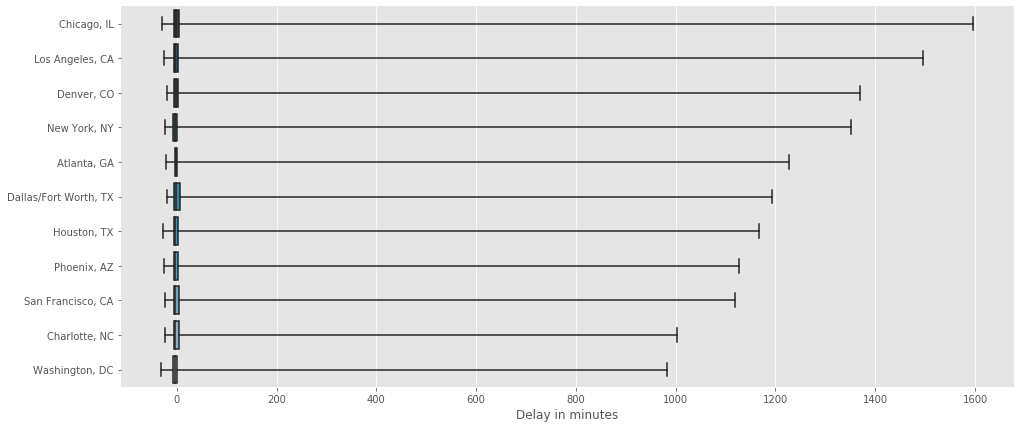

In [26]:
fig, ax = plt.subplots(figsize=(16,7))

sns.boxplot(x="DEP_DELAY",y="ORIGIN_CITY_NAME",data=multi_delay_early,whis="range",palette='PuBuGn_d')

ax.xaxis.grid(True)
ax.set(xlabel="Delay in minutes",ylabel="")
sns.despine(trim=True, left=True)

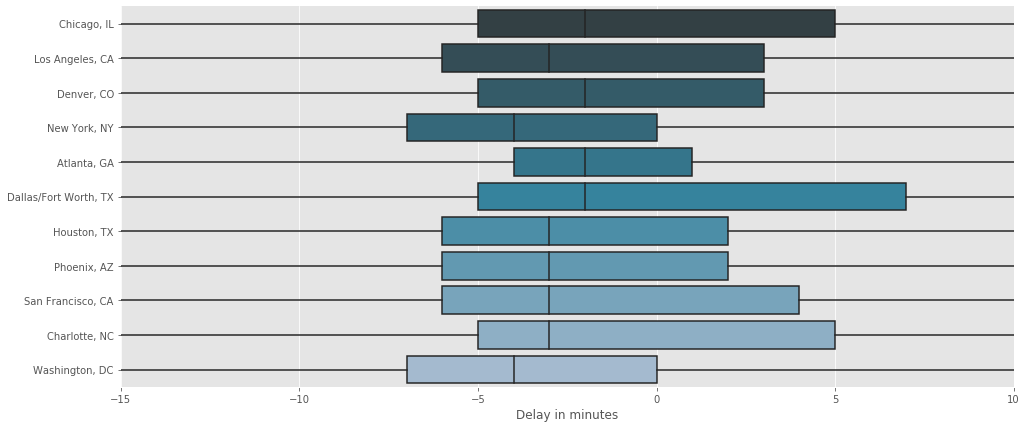

In [24]:
fig, ax = plt.subplots(figsize=(16,7))

sns.boxplot(x="DEP_DELAY",y="ORIGIN_CITY_NAME",data=multi_delay_early,whis="range",palette='PuBuGn_d')

ax.xaxis.grid(True)
ax.set(xlabel="Delay in minutes",ylabel="")
plt.xlim(-15,10)
sns.despine(trim=True, left=True)

In [37]:
for airport in airport_list:
    left = df_raw[(df_raw['ORIGIN_CITY_NAME'] == airport) & (df_raw['DEP_DELAY'].isnull() == False)]['DEP_DELAY'].quantile(q=0.025)
    right = df_raw[(df_raw['ORIGIN_CITY_NAME'] == airport) & (df_raw['DEP_DELAY'].isnull() == False)]['DEP_DELAY'].quantile(q=0.975)
    print(f'95% CI of {airport} airport is: {left:.2f}, {right:.2f}')

95% CI of Atlanta, GA airport is: -9.00, 67.00
95% CI of Chicago, IL airport is: -10.00, 96.00
95% CI of Dallas/Fort Worth, TX airport is: -9.00, 113.00
95% CI of New York, NY airport is: -13.00, 96.00
95% CI of Denver, CO airport is: -11.00, 83.75
95% CI of Charlotte, NC airport is: -10.00, 88.00
95% CI of Houston, TX airport is: -11.00, 86.90
95% CI of Los Angeles, CA airport is: -12.00, 86.00
95% CI of Washington, DC airport is: -14.00, 108.00
95% CI of Phoenix, AZ airport is: -11.00, 71.00
95% CI of San Francisco, CA airport is: -12.00, 117.00


# T-Test (Traffic Data)

Null Hypothesis: Delay time between San Francisco airport and Atlanta airport are the same
<br>
Alternate Hypothesis: Delay time between SF airport and ATL airport are different
<br>
alpha = 0.05
<br>
N = 300

In [28]:
SFO_N, ATL_N, SFO_avg, ATL_avg, co_var, t_score, p_val = two_sample_t_test(df_raw,'San Francisco, CA', 'Atlanta, GA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of ATL:{ATL_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of ATL:{ATL_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:13524
Sample Size of ATL:32107
Average delay of SFO:9.05
Average delay of ATL:4.89
Co-variance:0.43
t score:9.60
Two tail p val:0.00
One tail p val:0.00


In [29]:
SFO_N, ex_SFO_N, SFO_avg, Others_avg, co_var, t_score, p_val = t_test_against_others(df_raw,'San Francisco, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of other airports:{ex_SFO_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of other airports:{Others_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:13524
Sample Size of other airports:587123
Average delay of SFO:9.05
Average delay of other airports:6.12
Co-variance:0.39
t score:7.56
Two tail p val:0.00
One tail p val:0.00


# Rolling 12-months data

In [30]:
df_02 = read_data('../data/2019_02_ALL.csv')
df_03 = read_data('../data/2019_03_ALL.csv')
df_04 = read_data('../data/2019_04_ALL.csv')
df_05 = read_data('../data/2019_05_ALL.csv')
df_06 = read_data('../data/2019_06_ALL.csv')
df_07 = read_data('../data/2019_07_ALL.csv')
df_08 = read_data('../data/2019_08_ALL.csv')
df_09 = read_data('../data/2019_09_ALL.csv')
df_10 = read_data('../data/2019_10_ALL.csv')
df_11 = read_data('../data/2019_11_ALL.csv')
df_12 = read_data('../data/2019_12_ALL.csv')
df_01 = read_data('../data/2020_01_ALL.csv')

In [31]:
frames = [df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12,df_01]

In [32]:
df_one_year = pd.concat(frames)

In [34]:
df_one_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7445398 entries, 0 to 607345
Data columns (total 26 columns):
ARR_DELAY            float64
ARR_DELAY_NEW        float64
ARR_TIME             float64
CANCELLED            float64
CRS_ARR_TIME         int64
CRS_DEP_TIME         int64
DEP_DELAY            float64
DEP_DELAY_NEW        float64
DEP_TIME             float64
DEST                 object
DEST_AIRPORT_ID      int64
DEST_CITY_NAME       object
DEST_STATE_ABR       object
DISTANCE             float64
FL_DATE              object
MONTH                int64
OP_CARRIER_FL_NUM    int64
OP_UNIQUE_CARRIER    object
ORIGIN               object
ORIGIN_AIRPORT_ID    int64
ORIGIN_CITY_NAME     object
ORIGIN_STATE_ABR     object
QUARTER              int64
Unnamed: 22          float64
Unnamed: 24          float64
YEAR                 int64
dtypes: float64(10), int64(8), object(8)
memory usage: 1.5+ GB


In [35]:
df_one_year.sample(5)

,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLED,CRS_ARR_TIME,CRS_DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_TIME,DEST,...,OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,QUARTER,Unnamed: 22,Unnamed: 24,YEAR
184705,-15.0,NaN,1520.0,0.0,1535,1440,-4.0,NaN,1436.0,SAN,...,175,WN,SLC,14869,"Salt Lake City, UT",UT,1,NaN,NaN,2019
5864,-1.0,NaN,1258.0,0.0,1259,1135,8.0,NaN,1143.0,ABQ,...,443,DL,ATL,10397,"Atlanta, GA",GA,2,NaN,NaN,2019
623147,-19.0,NaN,2111.0,0.0,2130,1940,-4.0,NaN,1936.0,BHM,...,6368,YV,IAH,12266,"Houston, TX",TX,4,NaN,NaN,2019
519315,18.0,NaN,1338.0,0.0,1320,1050,28.0,NaN,1118.0,DCA,...,1380,B6,FLL,11697,"Fort Lauderdale, FL",FL,4,NaN,NaN,2019
225339,-8.0,NaN,932.0,0.0,940,811,-6.0,NaN,805.0,DFW,...,1572,AA,TUL,15370,"Tulsa, OK",OK,1,NaN,NaN,2019


In [44]:
df_one_year['ORIGIN_CITY_NAME'].nunique()

354

In [197]:
df_one_year['ORIGIN_CITY_NAME'].value_counts().head(20)

Chicago, IL              422539
Atlanta, GA              396044
Dallas/Fort Worth, TX    305620
New York, NY             298601
Denver, CO               253917
Houston, TX              240218
Charlotte, NC            236391
Los Angeles, CA          219763
Washington, DC           208215
Phoenix, AZ              181647
San Francisco, CA        170913
Las Vegas, NV            164997
Detroit, MI              162791
Minneapolis, MN          161209
Boston, MA               151316
Seattle, WA              144210
Orlando, FL              143869
Newark, NJ               136974
Philadelphia, PA         118903
Salt Lake City, UT       115987
Name: ORIGIN_CITY_NAME, dtype: int64

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

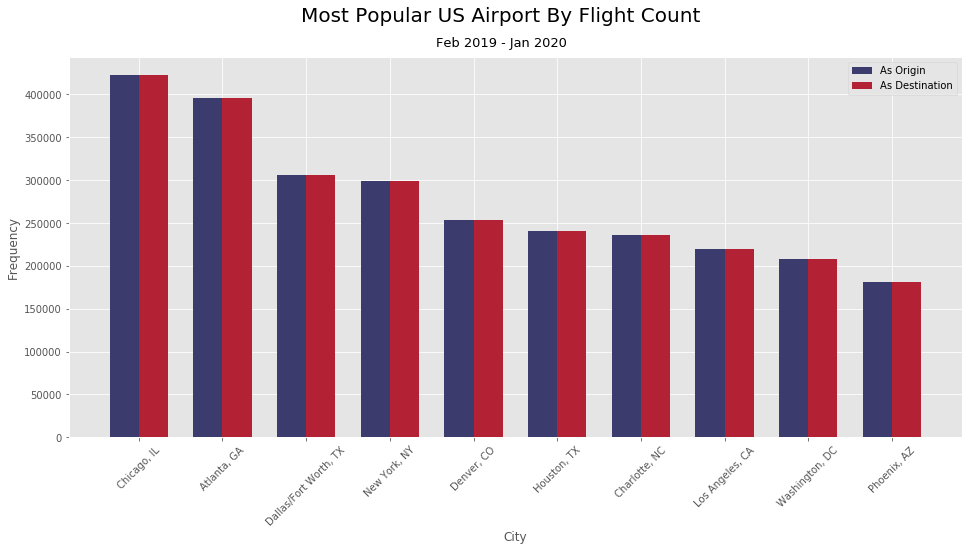

In [43]:
plot_top_10_by_state(df_one_year,'US','#3C3B6E','#B22234')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020',fontsize=13,ha='center')
# fig.savefig('img/most_popular.png')

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

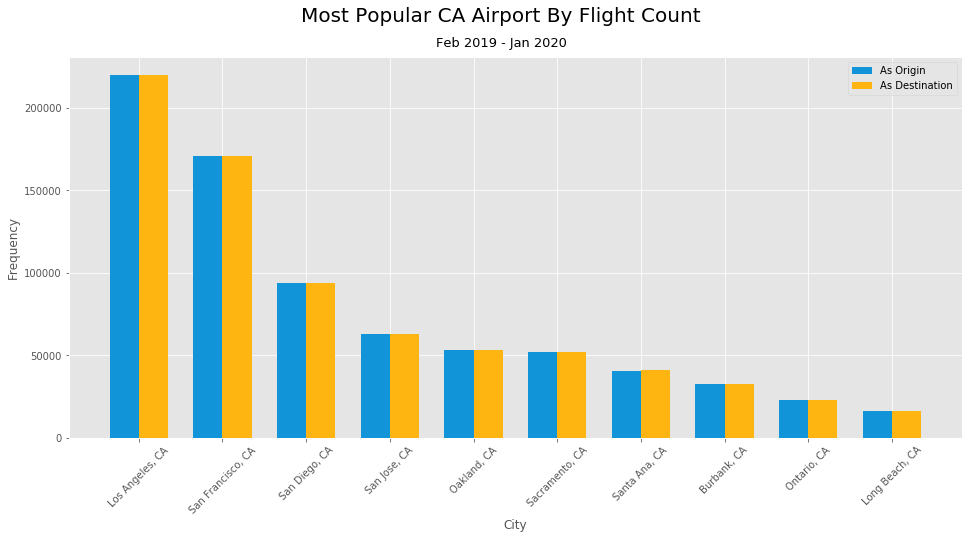

In [97]:
plot_top_10_by_state(df_one_year,'CA','#1295D8','#FFB511')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020',fontsize=13,ha='center')
# fig.savefig('img/most_popular_CA.png')

#### Cancellation

In [118]:
cancelled_flight = df_one_year.groupby(['ORIGIN_CITY_NAME','ORIGIN_STATE_ABR']).agg(
    total_flight=pd.NamedAgg(column='CANCELLED',aggfunc='count'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
    avg_dist=pd.NamedAgg(column='DISTANCE',aggfunc='mean')
)
cancelled_flight['cancelled_rate'] = cancelled_flight['cancelled_count'] / cancelled_flight['total_flight']
cancelled_flight = cancelled_flight.reset_index()

In [119]:
cancelled_flight

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,total_flight,cancelled_count,avg_dist,cancelled_rate
0,"Aberdeen, SD",SD,750,18.0,257.000000,0.024000
1,"Abilene, TX",TX,2270,41.0,158.000000,0.018062
2,"Adak Island, AK",AK,104,6.0,1192.000000,0.057692
3,"Aguadilla, PR",PR,2303,22.0,1246.702128,0.009553
4,"Akron, OH",OH,6261,155.0,471.334451,0.024756
...,...,...,...,...,...,...
349,"Wilmington, NC",NC,6902,136.0,358.443929,0.019704
350,"Worcester, MA",MA,1265,22.0,786.577075,0.017391
351,"Wrangell, AK",AK,724,14.0,56.500000,0.019337
352,"Yakutat, AK",AK,722,24.0,205.500000,0.033241


Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

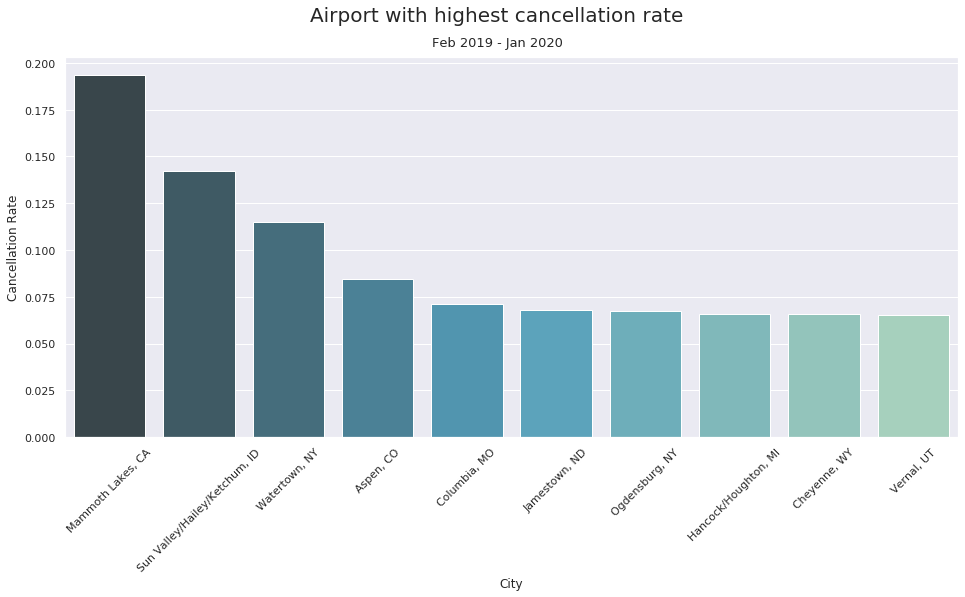

In [186]:
cancelled_flight_ = cancelled_flight.sort_values(by='cancelled_rate',ascending=False)
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1)
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_rate',data=cancelled_flight_[0:10],palette='GnBu_d')
ax.set_xlabel('City')
ax.set_ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'Airport with highest cancellation rate', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
# fig.savefig('img/highest_cancellation_rate.png')

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

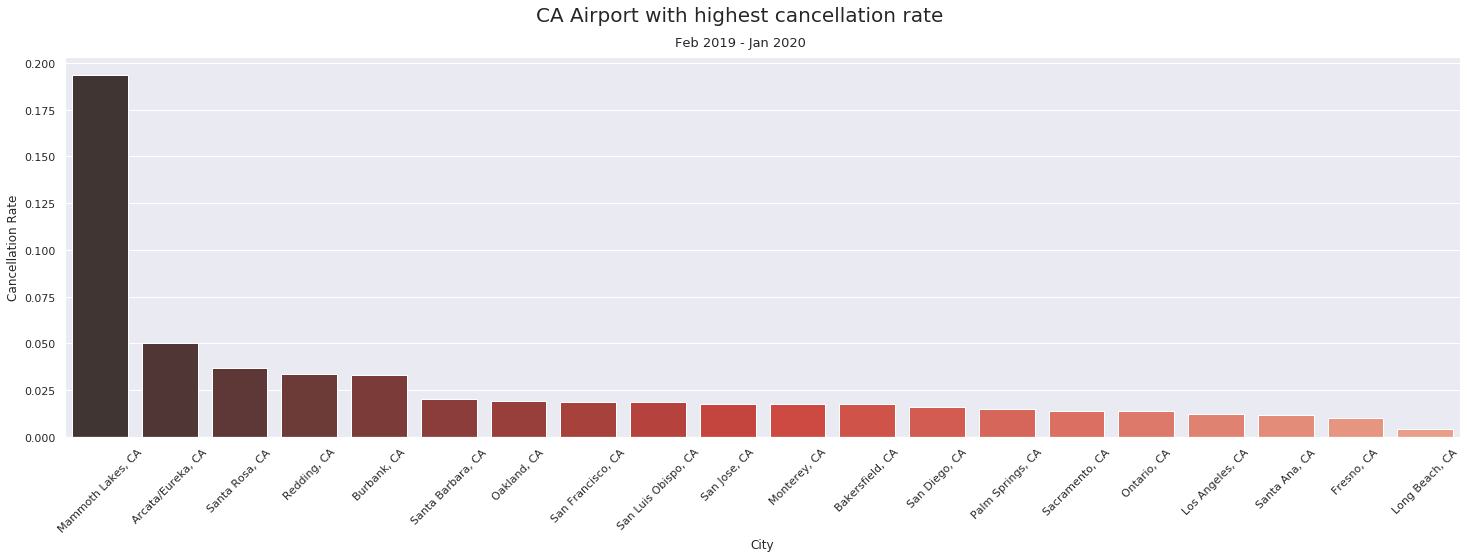

In [187]:
cancelled_flight_ = cancelled_flight[cancelled_flight['ORIGIN_STATE_ABR'] == "CA"].sort_values(by='cancelled_rate',ascending=False)
fig, ax = plt.subplots(figsize=(25,7))
sns.set(font_scale=1.25)
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_rate',data=cancelled_flight_[0:20],palette='Reds_d')
ax.set_xlabel('City')
ax.set_ylabel('Cancellation Rate')
plt.xticks(rotation=45,horizontalalignment='center')
plt.figtext(.5,.95,'CA Airport with highest cancellation rate', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
# fig.savefig('img/highest_cancellation_rate_CA.png')

In [92]:
cancelled_flight.describe()

,total_flight,cancelled_count,avg_dist,cancelled_rate
count,354.000000,354.000000,354.000000,354.000000
mean,21032.197740,353.466102,524.572816,0.022190
std,53639.868509,1019.250144,308.196688,0.018668
min,37.000000,0.000000,41.000000,0.000000
25%,959.500000,23.000000,300.863924,0.012304
50%,3103.000000,56.000000,470.060843,0.018558
75%,12182.750000,219.000000,689.985623,0.027013
max,422539.000000,11362.000000,2599.000000,0.193662


In [93]:
cancelled_flight.corr()

,total_flight,cancelled_count,avg_dist,cancelled_rate
total_flight,1.000000,0.907431,0.352114,-0.113411
cancelled_count,0.907431,1.000000,0.281797,-0.032271
avg_dist,0.352114,0.281797,1.000000,-0.261759
cancelled_rate,-0.113411,-0.032271,-0.261759,1.000000


In [94]:
busy_half = cancelled_flight[cancelled_flight['total_flight'] >= 3103]
inactive_half = cancelled_flight[cancelled_flight['total_flight'] < 3103]

In [95]:
busy_half.corr()

,total_flight,cancelled_count,avg_dist,cancelled_rate
total_flight,1.000000,0.896917,0.414661,-0.074700
cancelled_count,0.896917,1.000000,0.314031,0.099161
avg_dist,0.414661,0.314031,1.000000,-0.414405
cancelled_rate,-0.074700,0.099161,-0.414405,1.000000


In [96]:
inactive_half.corr()

,total_flight,cancelled_count,avg_dist,cancelled_rate
total_flight,1.000000,0.549305,-0.037571,-0.091385
cancelled_count,0.549305,1.000000,-0.129582,0.633602
avg_dist,-0.037571,-0.129582,1.000000,-0.139573
cancelled_rate,-0.091385,0.633602,-0.139573,1.000000


Text(0.8, 0.25, 'r = .-0.113')

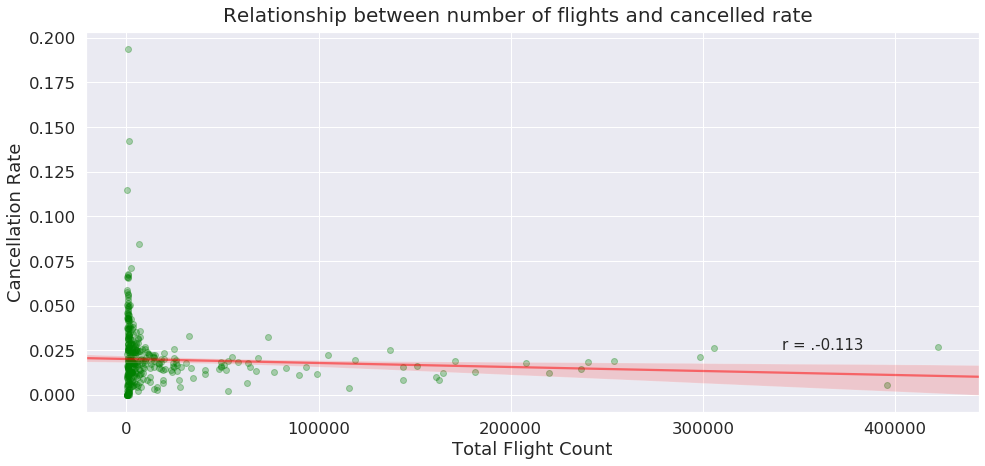

In [146]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='total_flight',y='cancelled_rate',data=cancelled_flight,robust=True, scatter_kws = {'color': 'green', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancellation Rate')
plt.figtext(.5,.9,'Relationship between number of flights and cancelled rate', fontsize=20, ha='center')
plt.figtext(.8,.25,'r = .-0.113', fontsize=15, ha='right')
# fig.savefig('img/flight_num_cancel_rate_corr.png')

Text(0.8, 0.25, 'r = -0.26')

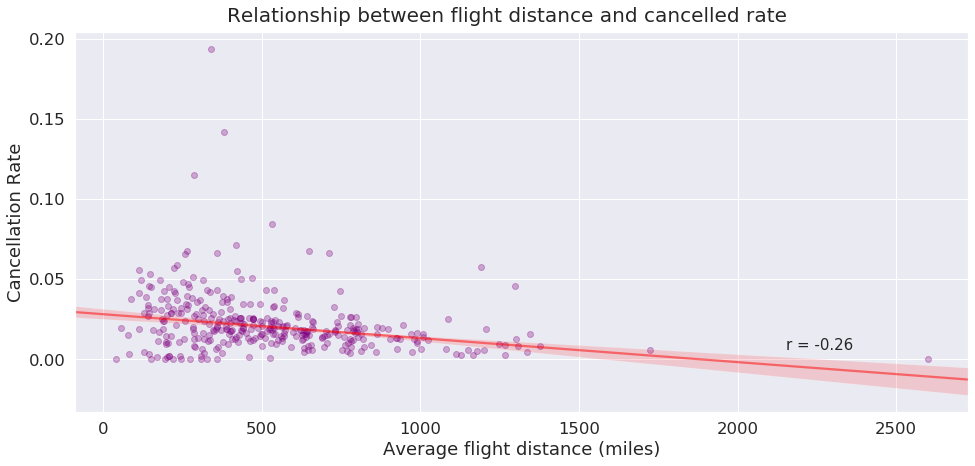

In [145]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='avg_dist',y='cancelled_rate',data=cancelled_flight,robust=True, scatter_kws = {'color': 'purple', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Average flight distance (miles)')
ax.set_ylabel('Cancellation Rate')
plt.figtext(.5,.9,'Relationship between flight distance and cancelled rate', fontsize=20, ha='center')
plt.figtext(.8,.25,'r = -0.26', fontsize=15, ha='right')
# fig.savefig('img/flight_dist_cancel_rate_corr.png')

#### Delay

In [102]:
df_one_year[['DEP_DELAY','DISTANCE']].corr()

,DEP_DELAY,DISTANCE
DEP_DELAY,1.000000,0.013656
DISTANCE,0.013656,1.000000


In [158]:
flight_delay = df_one_year.groupby(['ORIGIN_CITY_NAME','ORIGIN_STATE_ABR']).agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    avg_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    std_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='std'),
    avg_dist=pd.NamedAgg(column='DISTANCE',aggfunc='mean')
)
flight_delay = flight_delay.reset_index()

In [159]:
flight_delay.describe()

,total_flight,avg_delay_min,std_delay_min,avg_dist
count,354.000000,354.000000,354.000000,354.000000
mean,20691.932203,10.304992,59.455210,524.572816
std,52756.857645,5.964073,20.074013,308.196688
min,37.000000,-7.940666,12.125347,41.000000
25%,934.500000,7.581765,46.435146,300.863924
50%,3049.500000,9.988003,55.287795,470.060843
75%,12074.000000,13.066916,69.401048,689.985623
max,411619.000000,34.507003,126.205561,2599.000000


In [105]:
flight_delay.corr()

,total_flight,avg_delay_min,std_delay_min,avg_dist
total_flight,1.000000,0.021044,-0.230021,0.352785
avg_delay_min,0.021044,1.000000,0.775922,0.030804
std_delay_min,-0.230021,0.775922,1.000000,-0.168822
avg_dist,0.352785,0.030804,-0.168822,1.000000


Text(0.8, 0.55, 'r = 0.02')

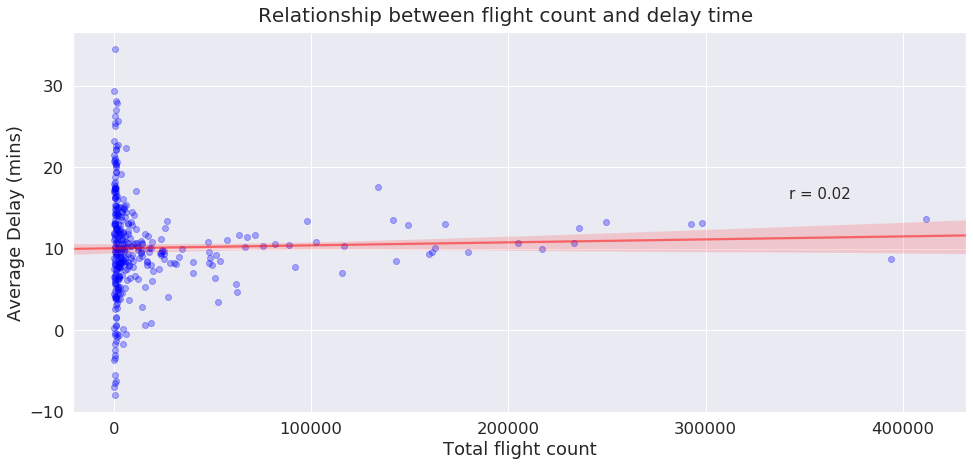

In [144]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='total_flight',y='avg_delay_min',data=flight_delay,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total flight count')
ax.set_ylabel('Average Delay (mins)')
plt.figtext(.5,.9,'Relationship between flight count and delay time', fontsize=20, ha='center')
plt.figtext(.8,.55,'r = 0.02', fontsize=15, ha='right')
# fig.savefig('img/flight_count_delay_corr.png')

Text(0.8, 0.55, 'r = 0.03')

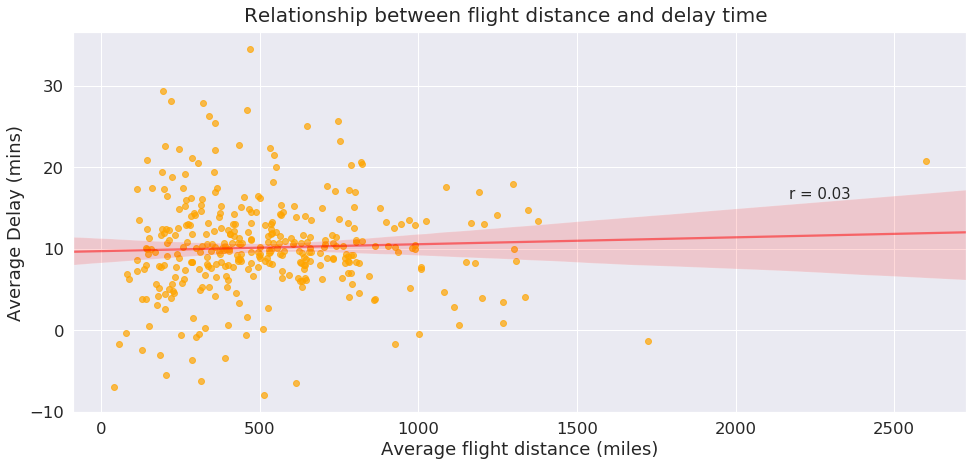

In [143]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='avg_dist',y='avg_delay_min',data=flight_delay,robust=True, scatter_kws = {'color': 'orange', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Average flight distance (miles)')
ax.set_ylabel('Average Delay (mins)')
plt.figtext(.5,.9,'Relationship between flight distance and delay time', fontsize=20, ha='center')
plt.figtext(.8,.55,'r = 0.03', fontsize=15, ha='right')
# fig.savefig('img/flight_count_delay_corr.png')

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

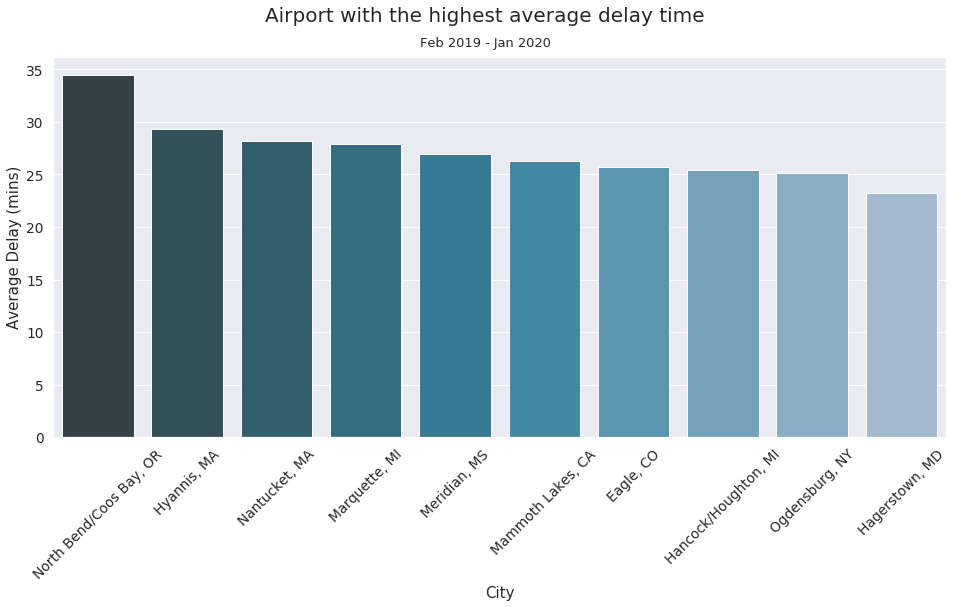

In [157]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay.sort_values(by='avg_delay_min',ascending=False)

ax = sns.barplot(x='ORIGIN_CITY_NAME',y='avg_delay_min',data=flight_delay_[0:10],palette='PuBuGn_d')
ax.set_xlabel('City')
ax.set_ylabel('Average Delay (mins)')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'Airport with the highest average delay time', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

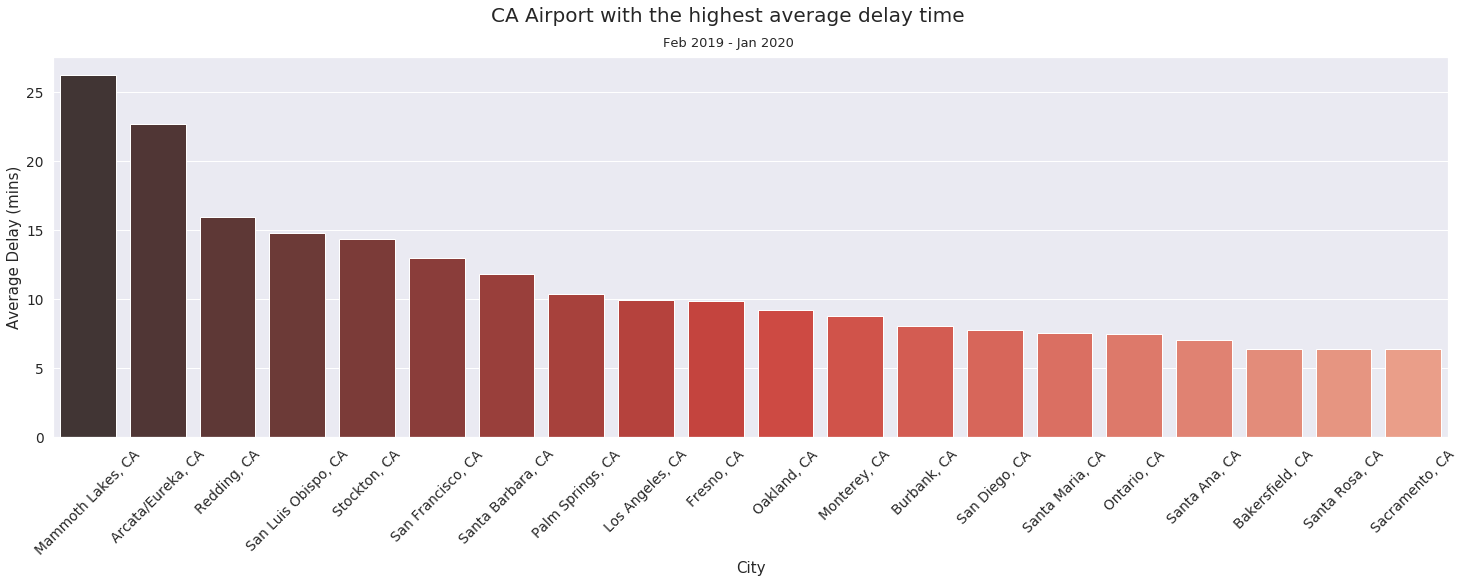

In [221]:
fig, ax = plt.subplots(figsize=(25,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay[flight_delay['ORIGIN_STATE_ABR'] == 'CA'].sort_values(by='avg_delay_min',ascending=False)

ax = sns.barplot(x='ORIGIN_CITY_NAME',y='avg_delay_min',data=flight_delay_[0:20],palette='Reds_d')
ax.set_xlabel('City')
ax.set_ylabel('Average Delay (mins)')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'CA Airport with the highest average delay time', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

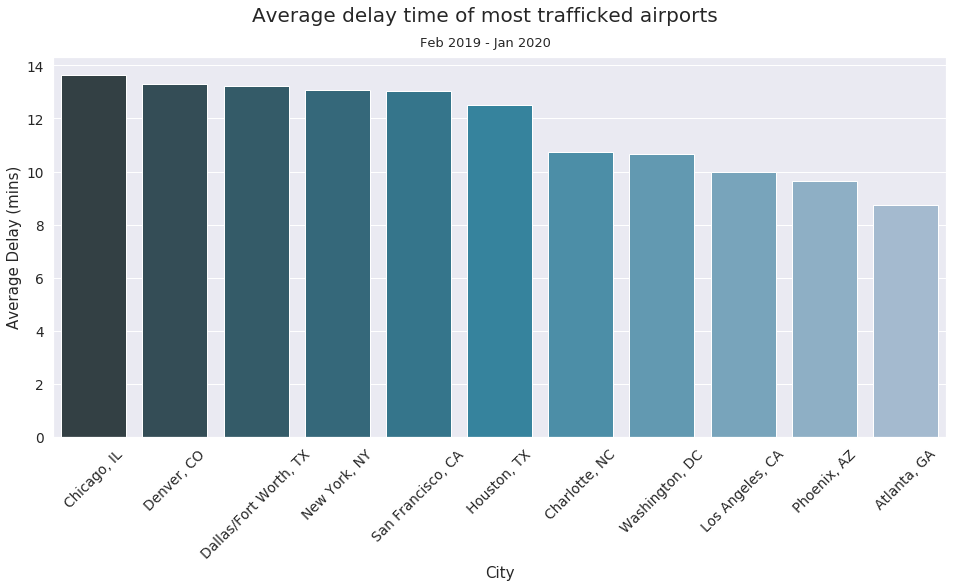

In [225]:
airport_list = [
'Chicago, IL',
'Atlanta, GA',
'Dallas/Fort Worth, TX',
'New York, NY',
'Denver, CO',
'Houston, TX',
'Charlotte, NC',
'Los Angeles, CA',
'Washington, DC',
'Phoenix, AZ',
'San Francisco, CA']

fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay[flight_delay['ORIGIN_CITY_NAME'].isin(airport_list)].sort_values('avg_delay_min',ascending=False)
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='avg_delay_min',data=flight_delay_,palette='PuBuGn_d')
ax.set_xlabel('City')
ax.set_ylabel('Average Delay (mins)')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'Average delay time of most trafficked airports', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')

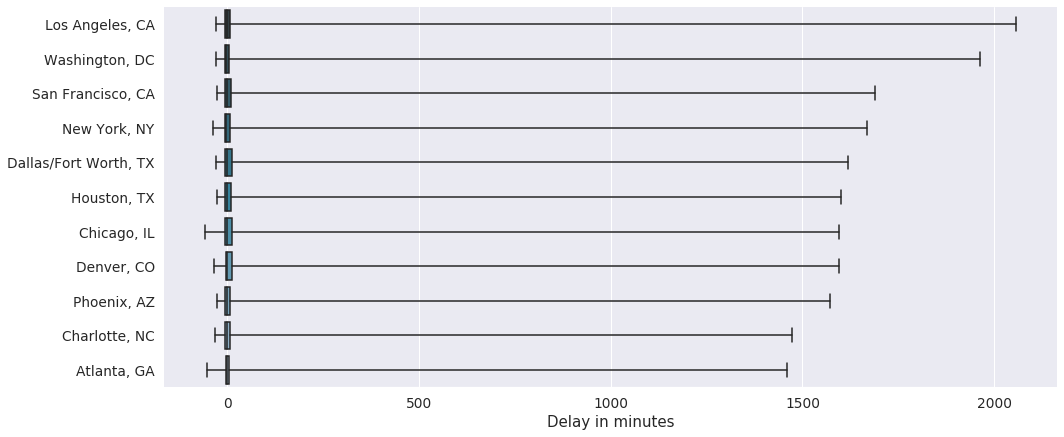

In [233]:
fig, ax = plt.subplots(figsize=(16,7))

flight_delay_all = df_one_year[(df_one_year['ORIGIN_CITY_NAME'].isin(airport_list)) & (df_one_year['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values('DEP_DELAY',ascending=False)


sns.boxplot(x="DEP_DELAY",y="ORIGIN_CITY_NAME",data=flight_delay_all,whis="range",palette='PuBuGn_d')

ax.xaxis.grid(True)
ax.set(xlabel="Delay in minutes",ylabel="")
sns.despine(trim=True, left=True)

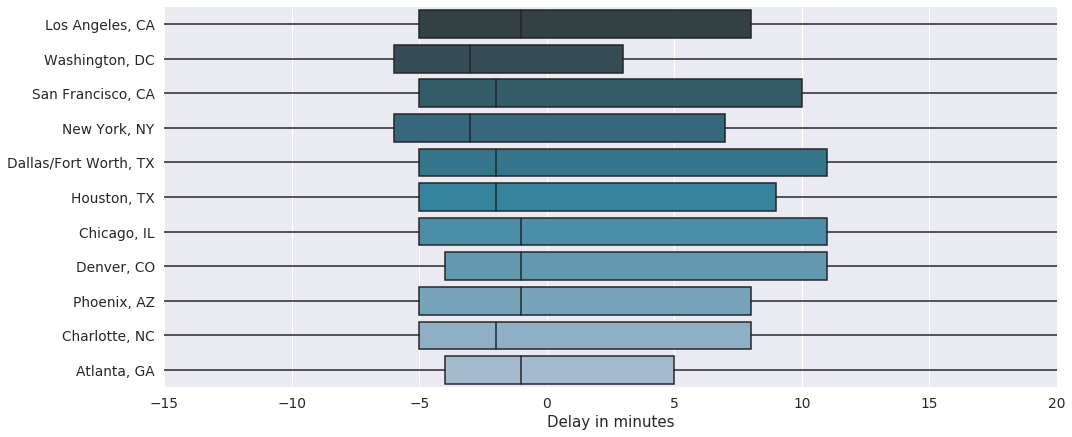

In [236]:
fig, ax = plt.subplots(figsize=(16,7))

flight_delay_all = df_one_year[(df_one_year['ORIGIN_CITY_NAME'].isin(airport_list)) & (df_one_year['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values('DEP_DELAY',ascending=False)


sns.boxplot(x="DEP_DELAY",y="ORIGIN_CITY_NAME",data=flight_delay_all,whis="range",palette='PuBuGn_d')

ax.xaxis.grid(True)
plt.xlim(-15,20)
ax.set(xlabel="Delay in minutes",ylabel="")
sns.despine(trim=True, left=True)

# T-Test

In [190]:
SFO_N, OAK_N, SFO_avg, OAK_avg, co_var, t_score, p_val = two_sample_t_test(df_one_year,'San Francisco, CA', 'Oakland, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of OAK:{OAK_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of OAK:{OAK_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of OAK:51968
Average delay of SFO:13.01
Average delay of OAK:9.24
Co-variance:0.18
t score:20.64
Two tail p val:0.00
One tail p val:0.00


In [191]:
SFO_N, LAX_N, SFO_avg, LAX_avg, co_var, t_score, p_val = two_sample_t_test(df_one_year,'San Francisco, CA', 'Los Angeles, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of LAX:{LAX_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of LAX:{LAX_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of LAX:217173
Average delay of SFO:13.01
Average delay of LAX:9.97
Co-variance:0.15
t score:20.34
Two tail p val:0.00
One tail p val:0.00


In [189]:
SFO_N, ex_SFO_N, SFO_avg, Others_avg, co_var, t_score, p_val = t_test_against_others(df_one_year,'San Francisco, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of other airports:{ex_SFO_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of other airports:{Others_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of other airports:7157191
Average delay of SFO:13.01
Average delay of other airports:10.57
Co-variance:0.12
t score:20.25
Two tail p val:0.00
One tail p val:0.00
